# Laboratorio SPICE

Borja Rullán Terrazas

## 1. Introducción

Para la realización de este ejercicio vamos a trabajar con SPICE, método estándar para la descripción de circuitos a partir de texto plano.  A continuación se enumeran diferentes interpretes de SPICE, todos ellos desarrollados a partir del original de la Universidad de Berkeley:

| Intérprete | Licencia    | Fabricante         | Características                  |
|------------|-------------|--------------------|----------------------------------|
| Ahkab      | GPL         | Giuseppe Venturini | Basado en Python                 |
| HSPICE     | Comercial   | Avant!             | Versión comercial, más robusta   |
| SPICE3     | BSD license | Berkeley           | Corre sobre plataformas UNIX     |
| ngspice    | BSD license |                    | Basado en SPICE3, Cider1 y Xspice|


### 1.1 Características de SPICE

A la descripción de texto plano que define el circuito se le llama netlist, algunos de los elementos básicos que lo componen son:

- Comentarios, que empiezan con el símbolo *
- Dispositivos básicos ( _V_ para fuentes de alimentacion, _R_ para resistencias, _C_ para condensadores y _L_ para bobinas)
- Puntos de union. Se utilizan normalmente numeracion secuencial. El único criterio que hay que seguir es que en el caso de una fuente de alimentación el nodo que pongamos primero será el que se encuentre más cerca del borne positivo.
- SPICE utiliza siempre las unidades del Sistema Internacional y no hay que hacer referencia a las mismas. Se pueden utilizar múltimplos utilizando _K_ para kilo, _m_ para mili y _u_ para micro. 
- Para las fuentes de alimentacion hay que especificar si se trata de corriente continua o alterna.
- El final del circuito se especifica con el comando _.end_.

Las unidades del Sistema Internacion relacionadas con la asignatura y con los circuitos en general que conozco son: 

| Unidad     | Símbolo  | Descripción                             | 
| ---------- | -------- | ----------------------------------------| 
| Voltios    | _V_      |  Potencial electrico                    | 
| Amperios   | _A_      | Intensidad                              | 
| Ohmios     | _Ω_      | Resistividad                            |
| Faradios   | _F_      | Capacidad, Unidad compuesta: A*/V       |
| Culombios  | _C_      | Carga electrica. Amperios por segundo   | 

### 1.2 Realización de análisis con SPICE

SPICE no solo permite la descripción del circuito sino también la realización de análisis sobre el mismo.  Los principales comandos de simulación son: 

- _.op_ :Devuelve voltaje e intensidad en cada rama y componente del circuito. 
- _.dc_ :Devuelve voltaje e intensidad en cada rama y componente del circuito pero nos permite cambiar el valor de voltaje de una fuente de alimentación en pasos consecutivos.
- _.tran_ :Permite realizar un análisis en el tiempo de los parametros del circuito. 

En el análisis _.tran_ hay que específicar el parámetro _uic_, que puede tener los siguientes valores: 

- _uic=0_: todas las corrientes y voltajes serán consideradas a cero en el comienzo del análisis temporral. Es decir, cuando _t =tstart_.
- _uic_=1: la situación en ‘t = tstart es el último resultado del análisis OP.
- _uic_=2: la situación en t=tstart es el último resultado del análisis OP en el que los valores son los específicados en su su condicion inicial a través del parámetro _.ic_. 
- _uic_=3: La situación se obtiene a partir de los valores almacenados en una directiva de concdición inicial _ic_. 


Podríamos clasificar SPICE dentro de de los lenguajes de programación orientados a objetos, ya que podríamos asimilar  una netlist a una instancia de un objeto circuito que tiene unas caracteristicas asociadas, que a su vez está compuesto de otras entidades (elementos básicos) y que tienen unas funciones (análisis), que tienen como parámetros de entrada los valores del netlist.




## 2. Trabajo práctico

Ahkab es un proyecto de Giusepe Venturini, y se trata de un simulador de circuitos Open-Source basado en SPICE y cuya última versión la 0.18 fue lanzada en Abril de 2017. Según sus creadores, Ahkab no pretende ser un simulador de grandes circuitos que compita con los grandes simuladores comerciales, es un simulador pequeño, siendo una de sus caracteristicas principales es que está desarrollado en un lenguaje interpretado como es Python.

Lo único que tenemos que hacer es importar las distintas librerias, incluyendo la de Ahkab y también pylab, que nos va a permitir dibujar las diferentes gráficas que vamos a obtener durante los ejercicios:

In [350]:
import pylab as plt
import ahkab
import sympy as py


## 2.1 Introducción Ley de Ohm

La Ley de Ohm indica que el voltaje que se disipa en un tramo de circuito es equivalente  a intensidad de la corriente ( cuantos electrones circulan por unidad de tiempo) por la resistencia del material en que se están desplazando.

$$V = I*R$$

Como veremos a continuación la Ley de Ohm está  ajustada a nivel dimensional, es decir, la naturaleza de lo que está a ambos lados del signo igual es la misma.

- Cuando una pila se conecta a dos metales, provoca que las cargas comiencen a viajar desde uno al otro, hasta que la diferencia de potencial se equipara al de la batería. La transferencia de carga es proporcional al voltaje de la bateria, a esta constante de proporcionalidad se le llama capacidad (_C_)

$$q = C*V$$

- Por otro lado, la intensidad representa la tasa de cambio de la carga con el tiempo 

$$I=\frac{d}{dt}*q$$

- Por lo tanto si volvemos a la Ley de Ohmy  sustituimos a ambos lados por los resultados obtenidos anteriormente tendremos

$$\frac{q}{C}=\frac{d}{dt}*q*R$$

Es decir, todo esta relacionado con las cargas y su viaje a traves del conductor, incorporando dos factores de proporcionalidad como son la capacidad (_C_) y la resistencia (_R_).




## 2.2 Circuito sencillo


Comenzamos a pintar el circuito más sencillo posible de todos a partir de la descripción obtenida en el enunciado de la actividad

In [26]:
%%writefile "circuito sencilloBRT.sp"
Circuito sencillo
r1 1 0 100
* una pila de 9 voltios en corriente continua
v1 0 1 type=vdc vdc=9
*empiezan los comando para realizar el análisis sobre el circuito
.op
*variamos el valor del voltaje desde 0 hasta 9 en pasos de 1 voltio
.dc v1 start=0 stop=9 step=1
* el fin de la descripción se especifica con el comando.end
.end

Overwriting circuito sencilloBRT.sp


Ahora vamos a leer la descripción del fichero con Ahkab, para a partir de ahí interpretar y ejecutar el análisis del circuito. Los resultados los vamos a volcar en la variable _lista de analisis_, que es una estructura tipo _list_ en Python. 

In [27]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito sencilloBRT.sp')


In [28]:
circuito = circuito_y_analisis [0]
analisis = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis)
print(lista_de_analisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


Las simulaciones que tendrán listas de datos, es decir, aquellas que no son _.op_, necesitan de un fichero temporal donde almacenar los resultados. Con este código identificamos que listas de análisis son del tipo _.dc_ o _.tran_ y añadimos la propiedad outfile en este caso. El siguiente código no es un buen ejemplo de optimización y elegancia pero es comprensible para personas no familiarizadas con Python como es mi caso:  



In [29]:

indexdc=0
indextran=0
for i in lista_de_analisis:
    if i['type']=="dc": 
        indexdc=lista_de_analisis.index(i)
    if i['type']=="tran": 
        indextran=lista_de_analisis.index(i)   

if indexdc>0:
    lista_de_analisis[indexdc]['outfile'] = "simulacionBRT dc.tsv"

if indextran>0:
    lista_de_analisis[indextran]['outfile'] = "simulacionBRT tran.tsv"


Comprobamos que el código anterior ha funcionado en el caso de dc, que es el que aplica en el ejericio. 



In [351]:
print(lista_de_analisis[1]['outfile'])

simulacionBRT dc.tsv



### 2.2.1 Resultado de la simulación _.dc_

Una vez separados los netlist de las diferentes simulaciones e informado el fichero donde se almacenaran los datos para el análisis _.dc_, ejecutaremos el método _.run_ de Ahkab:

Vamos a graficar el análisis correspondiente, en concreto, vamos a graficar como varía la intensidad en el circuito en función del voltaje V1, que es el que va variando en el análisis _.dc_ entre 0 y 9. Para ello utilizaremos la biblioteca matplotlib.

In [31]:
resultados = ahkab.run ( circuito,lista_de_analisis)

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done


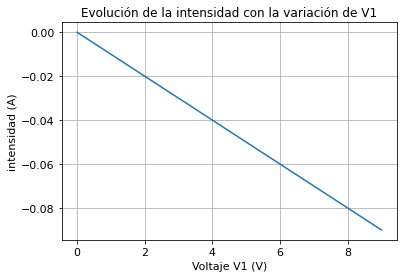

In [32]:


fig, ax = plt.subplots()
ax.plot (resultados['dc']['V1'], resultados['dc']['I(V1)'])

ax.set(xlabel='Voltaje V1 (V)', ylabel='intensidad (A)',
       title='Evolución de la intensidad con la variación de V1')
ax.grid()

plt.show()


Lo que estamos viendo en la gráfica es la variación de la intesidad de corriente a medida que vamos aumentando el voltaje de la pila. Podemos verificarlo a partir de la Ley de Ohm.

$$V = I*R$$ 

o lo que es lo mismo 

$$I=\frac{V}{R}$$

 En este  caso, que _R_ se mantiene fijo en 100 $\Omega$, la intensidad varia en función del valor de _V1_. Por ejemplo si _V1_ es igual a -2 _V_.

$$I=\frac{-2}{100}$$

Si realizamos los cálculos

$$I= -0.02A$$

veremos que coincide con lo devuelto por la gráfica.

### 2.2.1 Resultado de la simulación _.op_

Ahora vamos a realizar el análisis ._op_, pero antes de nada vamos a realizar los cálculos de forma muy simple, _copiando a mano_ los resultados y sin utilizar Sympy para validar la comprensión inicial del ejercicio.


In [32]:
v = -9 
r = 100
i= v/ r
print (i, "A")


-0.09 A


Este resultado es el mismo que tendría que salir con el análisis ._op_, a la que podemos acceder mediante la variable _results_.

In [35]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.09}


Para finalizar vamos a realizar los mismos cálculos utilizando la librería Sympy.

In [71]:

from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to

v1 = resultados['op']['V1'][0][0] * volts
r1 = 100*ohms
intensidad = py.symbols('i')
ley_ohm = py.Eq(v1, intensidad*r1)
solucion_para_intensidad = py.solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad

-0.09*ampere


## 2.3 Circuito sencillo con LTspice

Ahora pasamos a la resolución con LTspice siguiendo las instrucciones que vienen en el enunciado de la actividad. Lo primero es crear un alias del comando que apunte al ejecutable de LTspice, en el siguiente código las ocpiones -ascci y -b harán que los resultados se almacenen en un archivo c _.raw_ utilizando ascci.



In [10]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe -ascii -b

Como vemos a continuación la sintasis es un poco diferente con respecto a Ahkab, vamos a registrar de momento un netlist con el análisis _.op_

In [9]:
%%writefile "circuito_sencillo.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
.end

Overwriting circuito_sencillo.net


Para a continuación ejecutar el análisis con LTspice y mostrar los resultados del mismo.

In [11]:
lts "circuito_sencillo.net"

In [353]:
%pycat circuito_sencillo.log

C i r c u i t :   *   E s t e   e s   u n   c i r c u i t o   s e n c i l l o   a d a p t a d o   p a r a   L T s p i c e 
 
 D i r e c t   N e w t o n   i t e r a t i o n   f o r   . o p   p o i n t   s u c c e e d e d . 
 O p e r a t i n g   B i a s   P o i n t   S o l u t i o n : 
 V ( )                                   - 9       v o l t a g e 
 I ( R 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 I ( V 1 )                             - 0 . 0 9       d e v i c e _ c u r r e n t 
 
 
 D a t e :   T u e   J a n     5   1 3 : 5 0 : 2 5   2 0 2 1 
 T o t a l   e l a p s e d   t i m e :   0 . 0 0 1   s e c o n d s . 
 
 t n o m   =   2 7 
 t e m p   =   2 7 
 m e t h o d   =   t r a p 
 t o t i t e r   =   3 
 t r a n i t e r   =   0 
 t r a n p o i n t s   =   0 
 a c c e p t   =   0 
 r e j e c t e d   =   0 
 m a t r i x   s i z e   =   2 
 f i l l i n s   =   0 
 s o l v e r   =   N o r m a l 
 M a t r i x   C o m p i l e r 1 :               2   o p c 

El resultado del análisis .op no se está mostrando correctamente en Github así que se incluye captura de pantalla de los resultados en mi equipo: 


[![Captura-de-pantalla-2021-01-06-a-las-21-23-46.png](https://i.postimg.cc/8zDbCyJ3/Captura-de-pantalla-2021-01-06-a-las-21-23-46.png)](https://postimg.cc/F7WSWVxg)


Como sep uede observar los resultados son los mismos. En concreto, la intensidad que calcula es -0.09 _A_, es decir, lo mismo que lo calculado con Ahkab y lo mismo que lo calculado si aplicamos la Ley de Ohm.

Ahora pasamos a realizar el análisis _.dc_, para ello hemos realizado unas pequeñas modificaciones en la configuración del análisis (con respecto a lo que descrito en el enunciado de la actividad) para que coincida con la realizada con Ahkab.

In [42]:
%%writefile "circuito_sencilloBRT2.net"
* Este es un circuito sencillo adaptado para LTspice
r1 1 0 1000
v1 0 1 9
.dc v1 0 9 
.end

Overwriting circuito_sencilloBRT2.net


In [39]:
pip install ltspice

Note: you may need to restart the kernel to use updated packages.


In [43]:
lts "circuito_sencilloBRT2.net"


Ahora ya podemos ejecutar esta simulación, para ello tenemos que acceder al fichero _.raw_ que se almacena con los resultados, y para ello, tenemos que utilizar el paquete ltspyce de Python.

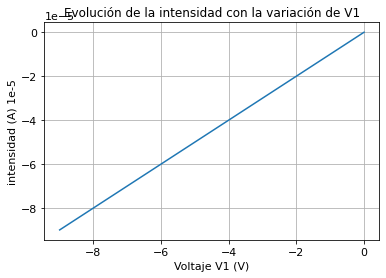

In [44]:
import ltspice
l = ltspice.Ltspice("circuito sencilloBRT2.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')



fig, ax = plt.subplots()
ax.plot (voltaje, corriente)

ax.set(xlabel='Voltaje V1 (V)', ylabel='intensidad (A) 1e-5',
       title='Evolución de la intensidad con la variación de V1')
ax.grid()

plt.show()

Como se puede observar la gráfica es similar a la obtenida con Ahkab, salvo el signo del voltaje, que en este caso es negativo.

## 2.4 Análisis de circuito con resistencias en serie


Lo primero es grabar el netlist en el fichero:

In [42]:
%%writefile "resistencias en serieBRT.net"
* circuito con tres resistencias en serie
v1 0 1 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k  
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serieBRT.net


Ejecutamos el análisis e imprimimos el resultado de los mismos

In [46]:
circuito_y_analisis2 = ahkab.netlist_parser.parse_circuit('resistencias en serieBRT.net')
circuito2 = circuito_y_analisis2[0]
analisis2 = circuito_y_analisis2[1]
lista_de_analisis2 = ahkab.netlist_parser.parse_analysis(circuito2, analisis2)
resultados2 = ahkab.run(circuito2, lista_de_analisis2)
print(resultados2['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* circuito con tres resistencias en serie'(netlist resistencias en serieBRT.net).
Run on 2021-01-05 20:28:44, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9       9e-12      0
V2          V        -1.5     1.5e-12    0
V3          V        -6.5     6.5e-12    0
I(V1)       A        -0.0005  0          0


A continuación vamos a calcular el potencial consumido por la resistencia R1 y a comprobar que los resultados coinciden con lo devuelto por Ahkab.

Lo primero es calcular la intensidad del circuito, para ello calculamos la resitencia total, que al estar en serie es la suma de las tres resitencias:

$$R_{EnSerie} = R_{1} + R_{2} + ... +R_{n} $$

Por otro lado, obtenemos también el voltaje de la fuente _V1_, que lo podemos obtener directamente de la variable donde hemos almacenado los resultados.


In [53]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to

v1 = resultados2['op']['V1'][0][0] * volts
r1 = 3*kilo*ohms
r2 = 10*kilo*ohms
r3 = 5*kilo*ohms
r_total = r1 + r2 + r3

Ahora pasamos a calcular la intensidad del circuito a partir de la Ley de Ohm:

In [55]:

intensidad = symbols('i')
ley_ohm = Eq(v1, intensidad*r_total)
solucion_para_intensidad = solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad



-0.0005*ampere

Como vemos, el resultado coincide con lo devuelto por Ahkab, ahora vamos a cálcular el potencial consumido por la resistencia R1 a partir de la intensidad de corriente previamente calculada.

In [140]:
v_R1 = symbols('i')
ley_ohm = Eq(v_R1,intensidad*r1)
solucion_v_R1 = solve(ley_ohm,v_R1)
v_R1 = convert_to(solucion_v_R1[0], [volts]).n(2)
v_R1

-8.8*volt

Como podemos observar el valor coincide también con lo devuelto por Ahkab. Podemos calcular también el voltaje consumido en el punto _V3_, que coincidirá con el potencial consumido por la resitencia _R1_ más el potencial consumido por la resistencia _R2_

In [63]:
 
v_R2 = symbols('i')
ley_ohm = Eq(v_R2,intensidad*r2)
solucion_v_R2 = solve(ley_ohm,v_R2)
v_R2 = convert_to(solucion_v_R2[0], [volts]).n(2)
v_R1 + v_R2


-6.5*volt

Como vemos los resultados también coinciden con lo devuelto por Ahkab. Nos queda pendiente de calcular lo consumido por la resistencia _R3_

In [66]:
v_R3 = symbols('i')
ley_ohm = Eq(v_R3,intensidad*r3)
solucion_v_R3 = solve(ley_ohm,v_R3)
v_R3 = convert_to(solucion_v_R3[0], [volts]).n(2)
v_R3

-2.5*volt

Ahora ya podemos demostrar que se cumple la Ley de Kirchhoff de la energia en un circuito, que indica que la suma de la energía suministrada por las fuentes es igual a las consumidas por las resistencias:

In [69]:
if (v1 == v_R1 + v_R2 + v_R3):
    print("Se cumple la Ley de Kirchhoff.")


Se cumple la Ley de Kirchhoff



## 2.4 Análisis de circuito con resistencias en paralelo

### 2.4.1 Circuito número 1

Lo primero es describir cada uno de los netlist, comenzamos con el primero de ellos.

In [61]:
%%writefile "resistencias en paralelo 1BRT.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 2 3 220
r4 3 0 1.5k
r5 2 0 470
.op
.end




Overwriting resistencias en paralelo 1BRT.cir


Realizamos el análisis e imprimimos los resultados

In [83]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1BRT.cir).
Run on 2021-01-06 05:58:26, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23532e-12    0
V3          V         -2.8215      2.82151e-12    0
I(VDD)      A         -0.00876467  0              0


Ahora pasamos a analizar los resultados, y comprobar que la intensidad que nos devuelve Ahkab coincide con los cálculos realizados a partir de la Ley de Ohm. En este caso, el cálculo de las resistencias en paralelo es la siguiente: 





$$\frac{1}{R_{EnParalelo}} = \frac{1}{R_{1}} + \frac{1}{R_{2}} + ... +\frac{1}{R_{n}}$$






In [85]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to

r1 = 1*kilo*ohms
r2 = 470*ohms
r3 = 220*ohms
r4 = 1.5*kilo*ohms

rtotal = r1 + 1 / (( 1 / (r3 + r4)) + ( 1/r2))

v1 = resultados['op']['V1'][0][0] * volts
intensidad = py.symbols('i')
ley_ohm = py.Eq(v1, intensidad*rtotal)
solucion_para_intensidad = py.solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad




-0.0088*ampere

Ahora bien, como se indica en el enunciado de la actividad, Ahkab solamente nos devuelve la intensidad de corriente de las ramas en las que hay una pila. Para calcular la intensidad de corriente en el resto de ramas tenemos que incorporar pilas virtuales en la rama donde estan las resistencias _R3_ y _R4_.

In [86]:
%%writefile "resistencias en paralelo 1BRTDummy.cir"
* resistencias en paralelo
vdd 0 1 vdc=12 type=vdc
r2 1 2 1k
r3 31 3 220
r4 3 0 1.5k
r5 21 0 470
v1d 21 2 vdc=0 type=vdc
v2d 31 2 vdc=0 type=vdc
.op
.end

Overwriting resistencias en paralelo 1BRTDummy.cir


In [87]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 1BRTdummy.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 1BRTdummy.cir).
Run on 2021-01-06 06:01:33, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V2          V         -3.23533     3.23533e-12    0
V31         V         -3.23533     3.23533e-12    0
V3          V         -2.8215      2.82151e-12    0
V21         V         -3.23533     3.23533e-12    0
I(VDD)      A         -0.00876467  0              0
I(V1D)      A          0.00688367  0              0
I(V2D)      A          0.001881    0              0


Los resultados son los mismos que los que había calculado pero con la diferencia de que nos devuelve la intensidad en el resto de ramas. Vamos a comprobar que se cumple la Ley de Kirchhoff para las corrientes:


$$I_{entrante} = \sum_{i}^{N} I_{salientes} $$



Hay que La intensidad entrante y las salientes tienen diferente signo por que van en distinta dirección en el circuito. OJO CON ESTE COMENTARIO QUE NO TENGO CLARO QUE SEA POR ESTO EXACTAMENTE, EXPLICAR MEJOR

In [168]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to


i_entrante = convert_to(-1*(resultados['op']['I(VDD)'][0][0]),[amperes]).n(2)
i_saliente1 =resultados['op']['I(V1D)'][0][0]
i_saliente2 =resultados['op']['I(V2D)'][0][0]
i_salientetotal =convert_to(i_saliente1+i_saliente2,[amperes]).n(2)


if (i_entrante == i_salientetotal):
    print("Se cumple la Ley de Kirchhoff.")






Se cumple la Ley de Kirchhoff.


Ahora tenemos que pasar a calcular los Voltajes y contrastarlo con lo que devuelve Ahkab a partir de los voltajes que devuelve la simulación. Comenzamos con el voltaje asociado a la resistencia _R2_

In [169]:
r2 = 470*ohms
v_R2 = symbols('i')
i_saliente1 =resultados['op']['I(V1D)'][0][0]*amperes
ley_ohm = Eq(v_R2,i_saliente1*r2)
solucion_v_R2 = solve(ley_ohm,v_R2)
v_R2 = convert_to(solucion_v_R2[0], [volts]).n(2)
v_R2

3.2*volt

In [ ]:
Ahora calculamos el potencial consumido por la resistencia _R3_, y vemos como el valor devuelto por Ahkab para el valor _V3_corresponde al potencial en el punto V2  menos el consumido por esta resitencia:

In [174]:
r3 = 220*ohms
v_R3 = symbols('i')
i_saliente2 =resultados['op']['I(V2D)'][0][0]*amperes
ley_ohm = Eq(v_R3,i_saliente2*r3)
solucion_v_R3 = solve(ley_ohm,v_R3)
v_R3 = convert_to(solucion_v_R3[0], [volts]).n(2)
v_R2 - v_R3

2.8*volt

### 2.4.2 Circuito número 2

Ahora pasamos a resolver el segundo ejercicio, vamos a incorporar de inicio las pilas con voltaje 0 en cada rama de forma que Ahkab nos devuelva la intensidad en todas ellas:

In [175]:
%%writefile "resistencias en paralelo 2BRT.cir"
* resistencias en paralelo
v1 0 1 type=vdc vdc=9
r1 1 2 47
v3d 2 21 type=vdc vdc=0
r2 21 3 220
r4 3 4 1000
r5 4 0 560
r3 2 5 180
v2 0 5 type=vdc vdc=1.5
.op
.end



Overwriting resistencias en paralelo 2BRT.cir


Procedemos a ejecutar el análisis e imprimir los resultados:

In [176]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 2BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)

print(resultados['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 2BRT.cir).
Run on 2021-01-06 07:38:18, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           8.99998e-12    0
V2          V        -7.29441     7.29442e-12    0
V21         V        -7.29441     7.29441e-12    0
V3          V        -6.39285     6.39287e-12    0
V4          V        -2.29487     2.29487e-12    0
V5          V        -1.5         1.5e-12        0
I(V1)       A        -0.0362891   0              0
I(V3D)      A        -0.00409798  0              0
I(V2)       A         0.0321912   0              0


Analizamos ahora los resultados, lo primero es comprobar que se cumple la Ley de Kirchhoff para las corrientes:


$$I_{entrante} = \sum_{i}^{N} I_{salientes} $$


Ojo, que como la anterior tengo que tener claro porque hay algunas intensidades que van en negativo y otras en positivo.

In [181]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to


i_entrante = convert_to(-1*(resultados['op']['I(V1)'][0][0]),[amperes]).n(2)
i_saliente1 =(resultados['op']['I(V2)'][0][0])
i_saliente2 =-1*(resultados['op']['I(V3D)'][0][0])
i_salientetotal =convert_to(i_saliente1+i_saliente2,[amperes]).n(2)


if (i_entrante == i_salientetotal):
    print("Se cumple la Ley de Kirchhoff.")


Se cumple la Ley de Kirchhoff.


Ahora tenemos que pasar a calcular los Voltajes y contrastarlo con lo que devuelve Ahkab a partir de las intensidades que devuelve la simulación. Comenzamos con el voltaje asociado a la resistencia _R1_, Ahkab devuelve en el valor V2 el voltaje de la pila V1 menos el potencial consumido por esta resistencia.

In [193]:
v1 =resultados['op']['V1'][0][0]*volts
r1 = 47*ohms
v_R1 = symbols('i')
i_entrante =resultados['op']['I(V1)'][0][0]*amperes
ley_ohm = Eq(v_R1,i_entrante*r1)
solucion_v_R1 = solve(ley_ohm,v_R1)
v_R1= convert_to(solucion_v_R1[0], [volts])
(v1 - v_R1).n(2)

-7.3*volt

Ahora pasamos a calcular el voltaje asociado a la resistencia R3. El valor que devuelve Ahkab es el valor existente en el punto V2 menos el potencial consumido por esta resistencia

In [197]:
r3 = 220*ohms
v_R3 = symbols('i')
i_saliente2 =resultados['op']['I(V3D)'][0][0]*amperes
ley_ohm = Eq(v_R3,i_saliente2*r3)
solucion_v_R3 = solve(ley_ohm,v_R3)
v_R3= convert_to(solucion_v_R3[0], [volts]).n(2)
(v1-v_R1-v_R3).n(2)

-6.4*volt

Ahora pasamos a caclular el voltaje asociado con la resistencia R4.El valor que devuelve Ahkab es el valor existente en el punto V3 menos el potencial consumido por esta resistencia

In [203]:
r4 = 1000*ohms
v_R4 = symbols('i')
i_saliente2 =resultados['op']['I(V3D)'][0][0]*amperes
ley_ohm = Eq(v_R4,i_saliente2*r4)
solucion_v_R4 = solve(ley_ohm,v_R4)
v_R4= convert_to(solucion_v_R4[0], [volts]).n(2)
(v1-v_R1-v_R3-v_R4).n(2)

-2.3*volt

### 2.4.3 Circuito número 3


Ahora pasamos a resolver el tercer ejercicio, en este caso el diagrama ya incorpora pilas con voltaje 0 en cada rama:

In [272]:
%%writefile "resistencias en paralelo 3BRT.cir"
* resistencias en paralelo
v0 0 1 type=vdc vdc=9
v1 1 2 type=vdc vdc=0
r1 2 0 10k
v2 1 3 type=vdc vdc=0
r2 3 0 2k
v3 1 4 type=vdc vdc=0
r2 4 0 1k
.op
.end

Overwriting resistencias en paralelo 3BRT.cir


Pasamos a ejecutar el análisis e imprimir los resultados:

In [215]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit('resistencias en paralelo 3BRT.cir')
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* resistencias en paralelo'(netlist resistencias en paralelo 3BRT.cir).
Run on 2021-01-06 08:26:28, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V0)       A        -0.0144    0        0
I(V1)       A        -0.0009    0        0
I(V2)       A        -0.0045    0        0
I(V3)       A        -0.009     0        0


Ahora pasamos a analizar los resultados, y comprobar que la intensidad que nos devuelve Ahkab coincide con los cálculos realizados a partir de la Ley de Ohm. En este caso, el cálculo de las resistencias en paralelo es la siguiente: 

$$\frac{1}{R_{EnParalelo}} = \frac{1}{R_{1}} + \frac{1}{R_{2}} + ... +\frac{1}{R_{n}}$$

Realizamos el cálculo en Sympi.

In [216]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to

r1 = 10*kilo*ohms
r2 = 2*kilo*ohms
r3 = 1*kilo*ohms

rtotal = 1 / (( 1 / r1) + ( 1/r2)+( 1/r3))

v1 = resultados['op']['V1'][0][0] * volts
intensidad = py.symbols('i')
ley_ohm = py.Eq(v1, intensidad*rtotal)
solucion_para_intensidad = py.solve(ley_ohm, intensidad)
intensidad = convert_to(solucion_para_intensidad[0], [amperes]).n(2)
intensidad

-0.014*ampere

Comprobamos que se cumple la Ley de Kirchhoff para las corrientes:


$$I_{entrante} = \sum_{i}^{N} I_{salientes} $$


Ojo, que como la anterior tengo que tener claro porque hay algunas intensidades que van en negativo y otras en positivo, aquí van todas en el mismo signo

In [222]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy import solve, symbols, Eq
from sympy.physics.units import convert_to

i_saliente1 =resultados['op']['I(V1)'][0][0]
i_saliente2 =resultados['op']['I(V2)'][0][0]
i_saliente3 =resultados['op']['I(V3)'][0][0]
i_entrante = convert_to(resultados['op']['I(V0)'][0][0],[amperes]).n(2)

i_salientetotal =convert_to(i_saliente1+i_saliente2+i_saliente3,[amperes]).n(2)

if (i_entrante == i_salientetotal):
    print("Se cumple la Ley de Kirchhoff.")

Se cumple la Ley de Kirchhoff.


Ahora tenemos que pasar a calcular los Voltajes y contrastarlo con lo que devuelve Ahkab a partir de las intensidades que devuelve la simulación. Comenzamos con el voltaje asociado a la resistencia R1. En este caso como solo hay una fuente de potencia y no hay ninguna resistencia antes de llegar a la primera _bifurcación_,los potenciales consumidos por cada una de las resistencias seran iguales entre ellos e iguales a fuente V1.

In [226]:
v_R1 = symbols('i')
i_saliente1 =resultados['op']['I(V1)'][0][0]*amperes
r1 = 10*kilo*ohms
v_R1 = symbols('i')
ley_ohm = Eq(v_R1,i_saliente1*r1)
solucion_v_R1 = solve(ley_ohm,v_R1)
v_R1= convert_to(solucion_v_R1[0], [volts]).n(2)
v_R1

-9.0*volt

In [229]:
v_R2 = symbols('i')
i_saliente2 =resultados['op']['I(V2)'][0][0]*amperes
r2 = 2*kilo*ohms
v_R2 = symbols('i')
ley_ohm = Eq(v_R2,i_saliente2*r2)
solucion_v_R2 = solve(ley_ohm,v_R2)
v_R2= convert_to(solucion_v_R2[0], [volts]).n(2)
v_R2

-9.0*volt

In [231]:
v_R3 = symbols('i')
i_saliente3 =resultados['op']['I(V3)'][0][0]*amperes
r3 = 1*kilo*ohms
v_R3 = symbols('i')
ley_ohm = Eq(v_R3,i_saliente3*r3)
solucion_v_R3 = solve(ley_ohm,v_R3)
v_R3= convert_to(solucion_v_R3[0], [volts]).n(2)
v_R3

-9.0*volt

## 2.5 Circuitos con DC que evolucionan en el tiempo

Lo primero de todo es almacenar el netlist


In [277]:
%%writefile "condensador en continuaBRT.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Writing condensador en continuaBRT.ckt


OJO QUE ESTE TEXTO ESTA COPIADO TAL CUAL

EL comando .tran realiza un análisis en el tiempo de los parámetros del circuito. Si no se emplea la directiva uic (use initial conditions) o esta es igual a cero, este análisis se realiza desde el punto estable de funcionamiento del circuito hasta un tiempo tfinal. y en intervalos tstep. Si empleamos un varlor distinto para parámetro uic, entonces se hará uso de las condiciones iniciales definidas para cada componente (típicamente ic=X en el caso de los condensadores, que da cuenta de la carga incial que estos pudieran tener).

ic = 0 es la carga inicial del condensador?

Ejecutamos e imprimimos la simulación



In [234]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("condensador en continuaBRT.ckt")
circuito = circuito_y_análisis[0]
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[1]['outfile'] = "simulación tran.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)
print(resultados['op'])
print(resultados['tran'].keys())



Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continuaBRT.ckt).
Run on 2021-01-06 08:42:23, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0
['T', 'V1', 'V2', 'I(V1)']


Pasamos a representar en una gráfica la evolución en el tiempo de la intensidad a medida que se va cargando el condensador.

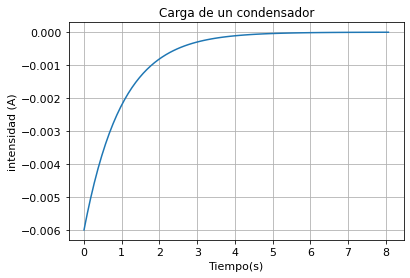

In [240]:

fig, ax = plt.subplots()
ax.plot (resultados['tran']['T'], resultados['tran']['I(V1)'])

ax.set(xlabel='Tiempo(s)', ylabel='intensidad (A)',
       title='Carga de un condensador')
ax.grid()

plt.show()


La intensidad en el circuito va bajando hasta que el condensador queda totalmente cargado. De la misma manera, el voltaje del condensador va subiendo hasta que llega a tener el mismo valor que el voltaje de la fuente V1. Lo podemos observar en la siguiente gráfica





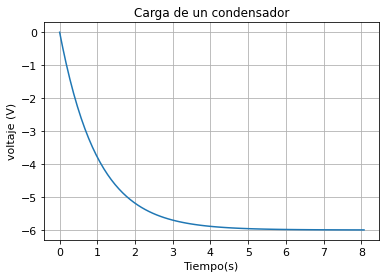

In [243]:
fig, ax = plt.subplots()
ax.plot (resultados['tran']['T'], resultados['tran']['V2'])

ax.set(xlabel='Tiempo(s)', ylabel='voltaje (V)',
       title='Carga de un condensador')
ax.grid()

plt.show()

Por lo que se puede observar, el análisis _.op_ devuelve los resultados en el momento estable, es decir, cuando el condensador ya está totalmente cargado y no hay cargas circulando por el circuito.

## 2.6 Carrera de condensadores


Vamos a crear el netlist a partir del que está descrito en el enunciado de la actividad, en este caso ya existen pilas virtuales de valor nulo en cada una de las ramas:

In [287]:
%%writefile "carrera en condensadoresBRT.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadoresBRT.ckt


Ahora pasamos a ejecutar el análisis .tran, los parametros establecidos son uic=0, es decir, que comenzamos en el tiempo estable del funcionamiento del circuito, con los valores de tiempo desde 6.5s a 7.5s en intervalos de 0.01.

Lo primero es ejecutar el análisis

In [288]:
circuito_y_análisis = ahkab.netlist_parser.parse_circuit("carrera en condensadoresBRT.ckt")
circuito = circuito_y_análisis[0]       
análisis_en_netlist = circuito_y_análisis[1]
lista_de_análisis = ahkab.netlist_parser.parse_analysis(circuito, análisis_en_netlist)
lista_de_análisis[0]['outfile'] = "simulación tran carrera condensadores.tsv"
resultados = ahkab.run(circuito, lista_de_análisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


Ahora pintamos las gráficas:

fig, ax = plt.subplots()
ax.plot (resultados['tran']['T'], resultados['tran']['V2'])

ax.set(xlabel='Tiempo(s)', ylabel='voltaje (V)',
       title='Carga de un condensador')
ax.grid()

plt.show()


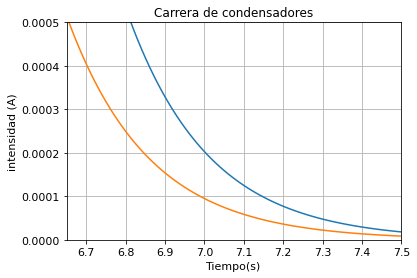

In [337]:
fig, ax = plt.subplots()
ax.plot (resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'])
ax.plot (resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'])
plt.xlim(6.65, 7.5)
plt.ylim(0.0, 0.0005)
ax.set(xlabel='Tiempo(s)', ylabel='intensidad (A)',
       title='Carrera de condensadores')
ax.grid()

plt.show()

Podemos observar que el condensador que se satura antes es el C2. Ahora pasamos a graficar la evolución de los voltajes del circuito,vemos que el voltaje en el borne V2 va evolucionando a medida que los condensadores se van cargando hasta llegar a ser 0. El voltaje en el V1 es estable en el valor de la pila

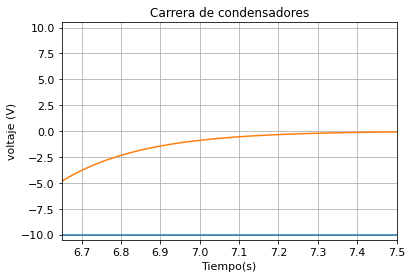

In [339]:

fig, ax = plt.subplots()
ax.plot (resultados['tran']['T'], resultados['tran']['V1'])
ax.plot (resultados['tran']['T'], resultados['tran']['V2'])
plt.xlim(6.65, 7.5)
plt.ylim(-10.5,10.5)
ax.set(xlabel='Tiempo(s)', ylabel='voltaje (V)',
       title='Carrera de condensadores')
ax.grid()

plt.show()




## 2.7 Circuitos en corriente alterna


Vamos a pasar a simular un circuito en corriente alterna , inicialmente utilizaremos LTspice

In [341]:
%%writefile "corriente alternaBRT.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Writing corriente alternaBRT.net


In [342]:
lts "corriente alternaBRT.net"


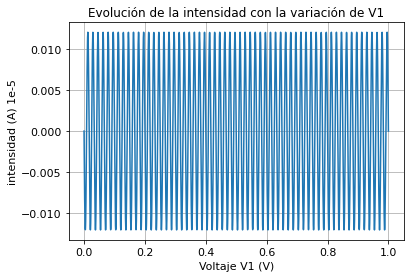

In [346]:
import ltspice
l = ltspice.Ltspice("corriente alternaBRT.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')

fig, ax = plt.subplots()
ax.plot (tiempo, corriente)

ax.set(xlabel='Voltaje V1 (V)', ylabel='intensidad (A) 1e-5',
       title='Evolución de la intensidad con la variación de V1')
ax.grid()

plt.show()

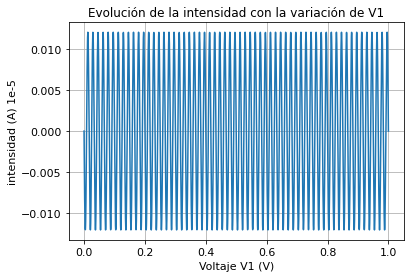

In [349]:
import ltspice
l = ltspice.Ltspice("corriente alternaBRT.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')

fig, ax = plt.subplots()
ax.plot (tiempo, corriente)

ax.set(xlabel='Voltaje V1 (V)', ylabel='intensidad (A) 1e-5',
       title='Evolución de la intensidad con la variación de V1')
ax.grid()

plt.show()

QUEDA HACER ESTE EJERCICIO CON AHKAB, REVISAR Y SUBIR